1. What is a Support Vector Machine (SVM) ?
SVM is a supervised machine learning algorithm used for classification and regression tasks. It finds the optimal hyperplane that best separates data points of different classes with the maximum margin.



2. What is the difference between Hard Margin and Soft Margin SVM?
Hard Margin: Assumes data is linearly separable with no misclassifications. It maximizes margin without allowing errors.

Soft Margin: Allows some misclassifications to handle noisy or overlapping data by introducing a penalty parameter C.

3. What is the mathematical intuition behind SVM?
SVM aims to find a hyperplane
𝑤𝑇𝑥+𝑏=0wTx+b=0 that separates classes while maximizing the margin 2∥𝑤∥∥w∥2​
 , subject to constraints that each data point lies on the correct side of the margin.


4. What is the role of Lagrange Multipliers in SVM?
They are used in the dual formulation of the optimization problem to incorporate constraints. Only data points with non-zero multipliers (support vectors) influence the final model.



5. What are Support Vectors in SVM?
Support vectors are the data points that lie closest to the decision boundary and directly affect the position and orientation of the hyperplane.


6. What is a Support Vector Classifier (SVC)?
SVC is the classification implementation of SVM in libraries like scikit-learn. It uses support vectors to define the decision boundary for classification tasks.


7. What is a Support Vector Regressor (SVR)?
SVR is the regression counterpart of SVM. It tries to fit a function within a margin of tolerance
𝜖
ϵ, minimizing deviations beyond that margin.

8. What is the Kernel Trick in SVM?
The kernel trick allows SVM to operate in high-dimensional spaces without explicitly transforming data, by using a kernel function (e.g., RBF) to compute dot products in that space.


9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel?
Kernal               Use case                          Equation
Linear              Linaer sepearble data             K(x,y)=x^ty             
Polynomial      when interraction of feature matter   K(x,y)=(x^ty+c)^d
RBF (Gaussian)   Non-linear Boundary                  K(x,y)=exp(-y||x-y)^2

10. What is the effect of the C parameter in SVM?
C controls the trade-off between maximizing margin and minimizing classification error.

High C: Less tolerance for misclassification (harder margin).

Low C: More tolerance, softer margin

11. What is the role of the Gamma parameter in RBF Kernel SVM?
Gamma defines how far the influence of a single training point reaches.

High gamma: Closer, more complex decision boundaries (overfitting risk).

Low gamma: Smoother boundaries.

12. What is the Naïve Bayes classifier, and why is it called "Naïve"?
Naïve Bayes is a probabilistic classifier based on Bayes’ Theorem, assuming independence between features — a "naïve" and rarely true assumption.

13. What is Bayes’ Theorem?
P(a|b)=P(B|A).P(A)/P(B).

14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve
Bayes, and Bernoulli Naïve Bayes?
Varient               Feature Type                  Distribution Assumed
Gaussain              Continuos FEature         Normal Distribution             
Multinomial      Discrete word count            Multinomial Distribution
Bernouli         Binary/Boolean Feature         Bernouli Distribution

15. When should you use Gaussian Naïve Bayes over other variants?
When features are continuous and follow a normal (Gaussian) distribution, such as in medical or sensor data.


16. What are the key assumptions made by Naïve Bayes?
Features are conditionally independent given the class.

Feature distributions match the chosen variant (Gaussian, Multinomial, etc.).

17. What are the advantages and disadvantages of Naïve Bayes?
Advantages:

Fast training and prediction.

Performs well on high-dimensional data.

Works well with text data.

Disadvantages:

Assumes feature independence.

Poor performance if features are highly correlated.

18. Why is Naïve Bayes a good choice for text classification?

Handles high-dimensional sparse data well.

Assumes independence between words (reasonable in bag-of-words).

Efficient and effective for spam detection, sentiment analysis, etc.

19. Compare SVM and Naïve Bayes for classification tasks?
Aspect                  SVM                        Naive Bayes
Type              Discriminative                 Generative             
Speed                Slower                       Fast
Accuracy              High                      Good for simple problem
Assumption       None about Data Distribution   Strong independence asssumption


20. How does Laplace Smoothing help in Naïve Bayes?

It avoids zero probability for unseen features by adding a small value (usually 1) to frequency counts, making the model more robust to sparse data.

In [1]:
#1. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Export to Excel
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df.to_excel('iris_dataset.xlsx', index=False)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM classifier
clf = SVC()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [2]:
#2. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Load dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Export to Excel
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y
df.to_excel('wine_dataset.xlsx', index=False)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear kernel
clf_linear = SVC(kernel='linear')
clf_linear.fit(X_train, y_train)
y_pred_linear = clf_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# RBF kernel
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)
y_pred_rbf = clf_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f'Linear Kernel Accuracy: {accuracy_linear:.2f}')
print(f'RBF Kernel Accuracy: {accuracy_rbf:.2f}')


Linear Kernel Accuracy: 0.98
RBF Kernel Accuracy: 0.76


In [3]:
#3. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Export to Excel
df = pd.DataFrame(X, columns=housing.feature_names)
df['target'] = y
df.to_excel('housing_dataset.xlsx', index=False)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVR
svr = SVR()
svr.fit(X_train, y_train)

# Predict and evaluate
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 1.35


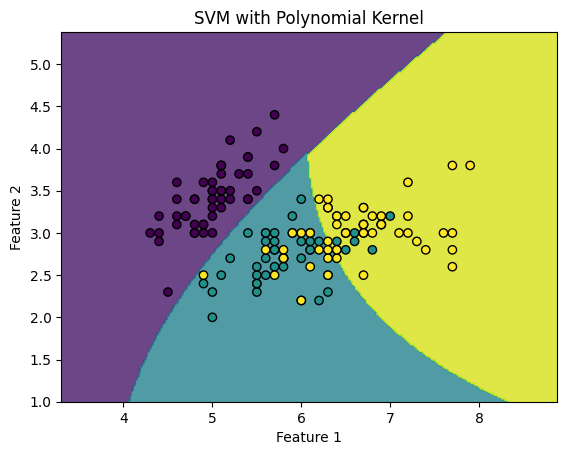

In [4]:
# 4. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use first two features for 2D visualization
y = iris.target

# Train SVM with polynomial kernel
clf = SVC(kernel='poly', degree=3)
clf.fit(X, y)

# Create mesh to plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.02  # Step size
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Polynomial Kernel')
plt.show()


In [5]:
#5. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd

# Load dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Export to Excel
df = pd.DataFrame(X, columns=cancer.feature_names)
df['target'] = y
df.to_excel('breast_cancer_dataset.xlsx', index=False)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gaussian Naïve Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.94


In [7]:
#6. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.
import re
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Fetch a subset of 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

# Clean illegal characters (remove control characters)
def clean_text(text):
    return re.sub(r'[\x00-\x1F\x7F-\x9F]', '', text)

# Clean and export to Excel
cleaned_texts = [clean_text(doc) for doc in newsgroups.data]
df = pd.DataFrame({'text': cleaned_texts, 'target': newsgroups.target})
df.to_excel("20newsgroups_dataset.xlsx", index=False)

# Vectorize the cleaned text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(cleaned_texts)
y = newsgroups.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate
clf = MultinomialNB()
clf.fit(X_train, y_train)
accuracy = accuracy_score(y_test, clf.predict(X_test))
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.63


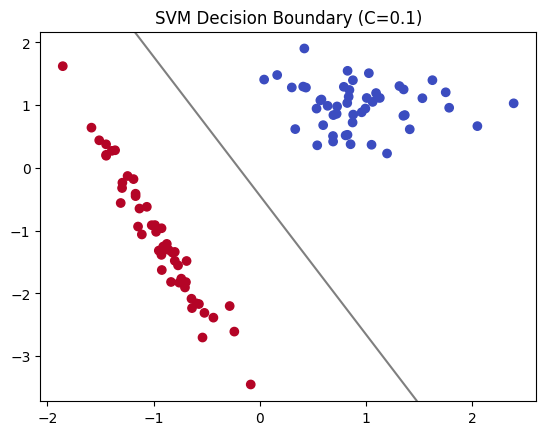

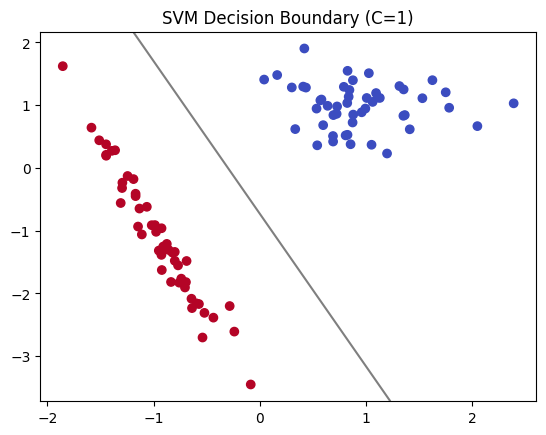

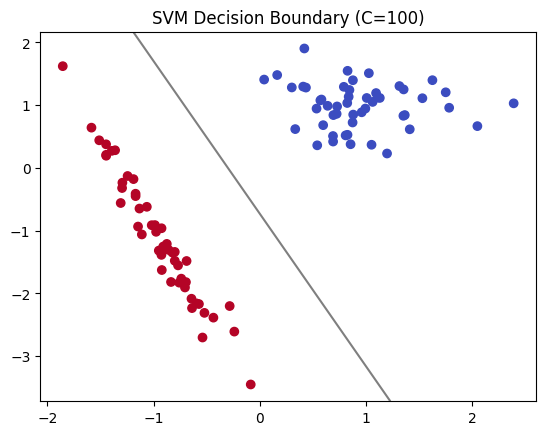

In [8]:
#7. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1)

for C in [0.1, 1, 100]:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)

    plt.figure()
    plt.title(f"SVM Decision Boundary (C={C})")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30),
                         np.linspace(ylim[0], ylim[1], 30))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5)
    plt.show()


In [9]:
#8. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import pandas as pd

X, y = make_classification(n_samples=500, n_features=20, n_informative=10, n_classes=2)
X_bin = (X > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_bin, y, test_size=0.3, random_state=42)
model = BernoulliNB()
model.fit(X_train, y_train)
accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.76


In [10]:
#9. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without scaling
model_unscaled = SVC()
model_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, model_unscaled.predict(X_test))

# With scaling
model_scaled = make_pipeline(StandardScaler(), SVC())
model_scaled.fit(X_train, y_train)
acc_scaled = accuracy_score(y_test, model_scaled.predict(X_test))

print(f"Unscaled Accuracy: {acc_unscaled:.2f}")
print(f"Scaled Accuracy: {acc_scaled:.2f}")


Unscaled Accuracy: 0.76
Scaled Accuracy: 0.98


In [11]:
#10. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without prior adjustment
model1 = GaussianNB()
model1.fit(X_train, y_train)
print("Accuracy without smoothing:", accuracy_score(y_test, model1.predict(X_test)))

# With modified priors (simulating smoothing)
model2 = GaussianNB(priors=[0.5, 0.5])
model2.fit(X_train, y_train)
print("Accuracy with priors (simulated smoothing):", accuracy_score(y_test, model2.predict(X_test)))


Accuracy without smoothing: 0.9415204678362573
Accuracy with priors (simulated smoothing): 0.9415204678362573


In [12]:
#11. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(), param_grid=params, cv=5)
grid.fit(X_train, y_train)

print(f"Best Params: {grid.best_params_}")
print(f"Test Accuracy: {accuracy_score(y_test, grid.predict(X_test)):.2f}")


Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy: 1.00


In [13]:
#12. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X, y = make_classification(n_samples=1000, weights=[0.9, 0.1], n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = SVC(class_weight='balanced')
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.96      0.90      0.93       268
           1       0.44      0.66      0.53        32

    accuracy                           0.87       300
   macro avg       0.70      0.78      0.73       300
weighted avg       0.90      0.87      0.88       300



In [14]:
#13. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

emails = ["Win a free iPhone", "Lowest price for medicine", "Hello, how are you?", "Let's have lunch"]
labels = [1, 1, 0, 0]  # 1 = spam, 0 = not spam

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = MultinomialNB()
model.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Accuracy: 1.0


In [15]:
#14. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

svm_model = SVC()
nb_model = GaussianNB()

svm_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

print("SVM Accuracy:", accuracy_score(y_test, svm_model.predict(X_test)))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_model.predict(X_test)))


SVM Accuracy: 0.9736842105263158
Naive Bayes Accuracy: 0.9736842105263158


In [16]:
#15. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Without feature selection
nb1 = GaussianNB()
nb1.fit(X_train, y_train)
acc1 = accuracy_score(y_test, nb1.predict(X_test))

# With feature selection
selector = SelectKBest(score_func=f_classif, k=2)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

nb2 = GaussianNB()
nb2.fit(X_train_new, y_train)
acc2 = accuracy_score(y_test, nb2.predict(X_test_new))

print(f"Original Accuracy: {acc1:.2f}")
print(f"After Feature Selection: {acc2:.2f}")



Original Accuracy: 0.97
After Feature Selection: 0.95


In [17]:
#16. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model_ovr = OneVsRestClassifier(SVC())
model_ovo = OneVsOneClassifier(SVC())

model_ovr.fit(X_train, y_train)
model_ovo.fit(X_train, y_train)

print("OvR Accuracy:", accuracy_score(y_test, model_ovr.predict(X_test)))
print("OvO Accuracy:", accuracy_score(y_test, model_ovo.predict(X_test)))


OvR Accuracy: 0.6666666666666666
OvO Accuracy: 0.7555555555555555


In [18]:
#17. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

for kernel in ['linear', 'poly', 'rbf']:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"{kernel} kernel accuracy: {acc:.2f}")


linear kernel accuracy: 0.97
poly kernel accuracy: 0.94
rbf kernel accuracy: 0.94


In [19]:
#18. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.datasets import load_iris
from sklearn.svm import SVC

X, y = load_iris(return_X_y=True)
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(SVC(), X, y, cv=cv)

print("Average Accuracy:", scores.mean())



Average Accuracy: 0.9666666666666666


In [29]:
#19. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train with default priors
model_default = GaussianNB()
model_default.fit(X_train, y_train)
y_pred_default = model_default.predict(X_test)
print("Default Prior Accuracy:", accuracy_score(y_test, y_pred_default))

# Train with custom priors (simulate belief that both classes are equally likely)
model_custom = GaussianNB(priors=[0.5, 0.5])
model_custom.fit(X_train, y_train)
y_pred_custom = model_custom.predict(X_test)
print("Custom Prior Accuracy:", accuracy_score(y_test, y_pred_custom))



Default Prior Accuracy: 0.9415204678362573
Custom Prior Accuracy: 0.9415204678362573


In [21]:
#20. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(kernel='linear')
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, y_train)

model.fit(rfe.transform(X_train), y_train)
accuracy = accuracy_score(y_test, model.predict(rfe.transform(X_test)))
print(f"Accuracy after RFE: {accuracy:.2f}")


Accuracy after RFE: 0.93


In [22]:
#21. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.63      0.90      0.75        21
           2       0.60      0.21      0.32        14

    accuracy                           0.76        54
   macro avg       0.74      0.71      0.69        54
weighted avg       0.75      0.76      0.72        54



In [23]:
#22. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
loss = log_loss(y_test, probs)
print(f"Log Loss: {loss:.4f}")


Log Loss: 0.4899


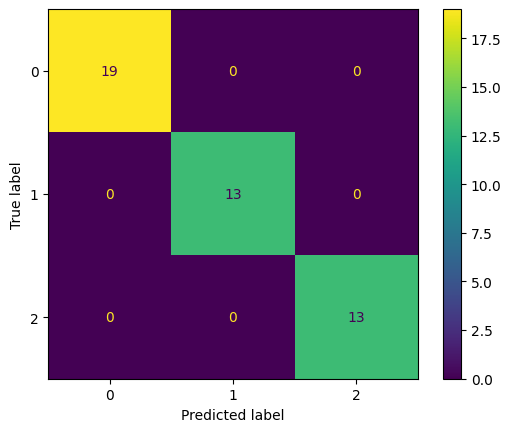

In [24]:
#23. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC()
model.fit(X_train, y_train)

cm = confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [25]:
#24. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=5, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVR()
model.fit(X_train, y_train)

mae = mean_absolute_error(y_test, model.predict(X_test))
print(f"Mean Absolute Error: {mae:.2f}")


Mean Absolute Error: 66.15


In [27]:
#25. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_scores)
print(f"ROC-AUC Score: {auc:.2f}")


ROC-AUC Score: 0.99


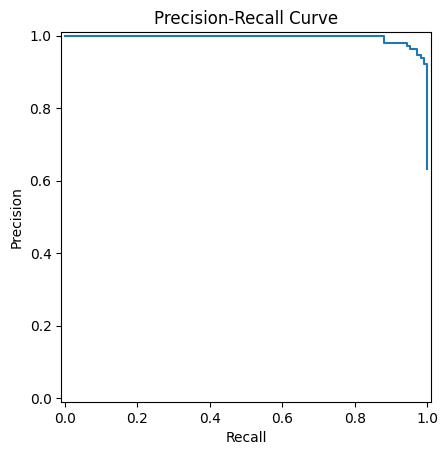

In [28]:
#26. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(probability=True)
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, probs)

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()
